# Gradiente Descendiente en Python

<div style="font-size: 1.1rem; text-align: justify;">

Este notebook corresponde al estudio del algoritmo de optimización del gradiente descendiente aplicado programáticamente con Python, a partir del tutorial de Youtube del canal <a href="https://www.youtube.com/@CodigoMaquina" target="_blank">Código Máquina</a>.

El siguiente es el link que lleva a dicho tutorial: <br>
<a href="https://www.youtube.com/watch?v=FNWbigoQNOk" target="_blank">Gradiente Descendiente Paso a Paso</a>

</div>

## Regresión Lineal con Gradiente Descendiente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sklearn.linear_model import LinearRegression

<div style="font-size: 1.1rem; text-align: justify;">

Utilizaremos el modelo de Regresion Lineal que se puede generar a través de SckitLearn (que utliza otro tipo de optimización, la de los mínimos cuadrados) para tener una idea de cuán bien llegaremos a optimizar nuestro modelo a través del gradiente descendiente y tener el primer modelo de regresión lineal como referencia.

Bien podríamos también utilizar el algoritmo implementado de Sckitlearn del gradiente descendiente, pero la idea aquí es que nosostros aprendamos :)
</div>

Intersección con eje Y (constante b): 0.00
Pendiente (m): 2.10
Suma de cuadrados de los residuos/errores (RSS): 31.42


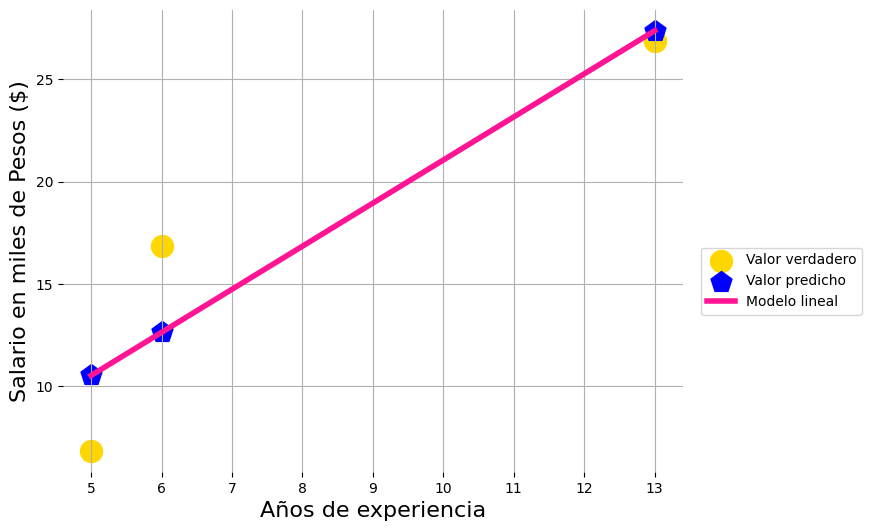

In [8]:
# Variable independiente - años de experiencia en un trabajo
experiencia = np.array([
    [ 5],
    [ 6],
    [13]
])

# Variable dependiente u objetivo - salario en función de los años de experiencia (en miles de pesos mexicanos) - variable que deseamos predecir
salario = np.array([6.85, 16.83, 26.84])

# Modelo lineal creado con el metodo de minimos cuadrados
modelo = LinearRegression().fit(experiencia.reshape(3, -1), salario)

# Visualizacion de datos y modelo
print("Intersección con eje Y (constante b): %0.2f" % modelo.intercept_)
print("Pendiente (m): %0.2f" % modelo.coef_[0])
# En el siguiente paso obtengo el error, que recordemos es la diferencia entre las observaciones reales y mis predicciones, cada una elevada al cuadrado y al final se suma todo
# como el producto escalar: e = y - y_hat   -> e = e . e
# recordar que la idea de elevar al cuadrado cada uno es para que no haya errores con signo negativo
print("Suma de cuadrados de los residuos/errores (RSS): %0.2f" % ((salario - modelo.predict(experiencia))**2).sum())

plt.figure(figsize=(8, 6))

# Genera puntos de las observaciones reales
plt.scatter(experiencia, salario, 
            color="gold", s=250, marker="o", label="Valor verdadero")

# Genera puntos de mis predicciones
plt.scatter(experiencia, modelo.predict(experiencia),
           color="blue", s=250, marker="p", label="Valor predicho")

# Genera la recta del modelo
plt.plot(experiencia, modelo.predict(experiencia),
        linewidth=4, color="deeppink", label="Modelo lineal")

experiencia = experiencia.reshape(3)

plt.ylabel("Salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de experiencia", size=16)
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()

<div style="font-size: 1.1rem; text-align: justify;">

Ahora usaremos estos valores del modelo como referencia para llegar a lo mismo pero con el algoritmo del gradiente descendiente. 
Este ejemplo es sencillo, especialmente porque nos centraremos para el caso en optimizar el parámetro de la pendiente, ya que 
la ordenada al origen vimos que es cero.
Debeos llegar a la misma pendiente para cerciorarnos que el error sea el mínimo y por lo tanto la pendiente será la más óptima.
</div>

## Diferentes modelos con diferentes pendientes

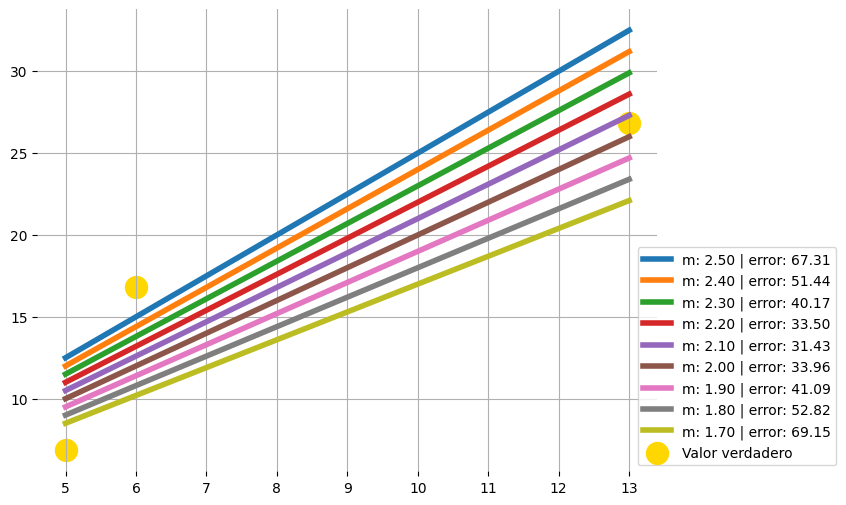

In [9]:
# creacion de multiples pendientes para exploracion y visualizacion de cual es la mas optima (que no es otra que la antes calculada)
pendientes = np.arange(2.5, 1.6, -0.1)

# vector para almacenar el error de los diferentes modelos
errores = np.array([])

# visualizacion de los modelos

plt.figure(figsize=(8, 6))

for pendiente in pendientes:
    # Error del modelo si tuviera esa pendiente (error = suma de cuadrados de los residuos)
    # y_hat = pendiente * experiencia -> array de mis predicciones (la constante b no esta porque es cero e para este ejemplo)
    # y = salario -> array d elas observaciones verdaderas
    error = ((pendiente * experiencia - salario)**2).sum()

    # visualizacion de un modelo para una pendiente dada
    plt.plot(experiencia, pendiente*experiencia, 
            linewidth=4, label="m: %0.2f | error: %0.2f" % (pendiente, error))

    errores = np.append(errores, error)

plt.scatter(experiencia, salario, 
            color="gold", s=250, marker="o", label="Valor verdadero")

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()

## Visualización de los errores

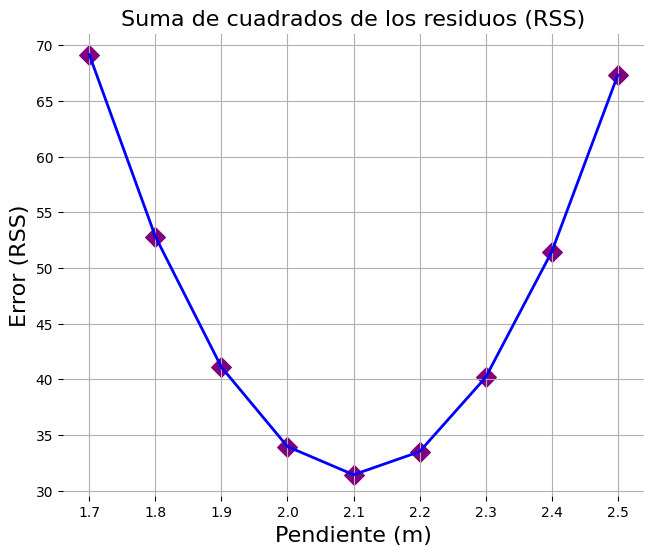

In [13]:
# La siguiente grafica nos permite notar que claramente el error mas pequeño se genera con un valor de pendiente = 2.1

plt.figure(figsize=(7.5, 6))
plt.title("Suma de cuadrados de los residuos (RSS)", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("Pendiente (m)", size=16)
plt.scatter(pendientes, errores, color="purple", marker="D", s=99)
plt.plot(pendientes, errores, color="blue", linewidth=2)
plt.grid()
plt.box(False)
plt.show()

<h2 style="color:white">Función de Error a ser Minimizada</h2>
<h3 style="color:white">Suma de los cuadrados de los residuos (RSS)</h3>

<div style="font-size: 1.1rem; text-align: justify;">
$$\text{RSS}(y, \hat{y}) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

$$ y_i = \text{salario}_i $$

$$ \hat{y}_i = m\cdot\text{experiencia}_i $$


Donde $y$ son los valores verdaderos, $\hat{y}$ son los valores predichos y $n$ es el tamaño de la muestra.

Ahora realizaremos un paso a paso para optimizar mediante el algoritmo del gradiente descendiente
</div>

In [23]:
# persona 1: (6.85, 5), persona 2: (16.83, 6), persona 3: (26.84, 13)

m = sym.Symbol("m")

# Funcion de error
error = (6.85 - m * 5)**2 + (16.83 - m * 6)**2 + (26.84 - m * 13)**2

# Derivada de la funcion de error
derivada = sym.diff(error, m)

for pendiente in pendientes:
    print("Funcion de error derivada:", derivada, "-> Evaluacion con m = %0.2f: %0.2f" % (pendiente, derivada.evalf(subs={m : pendiente})))


Funcion de error derivada: 460.0*m - 968.3 -> Evaluacion con m = 2.50: 181.70
Funcion de error derivada: 460.0*m - 968.3 -> Evaluacion con m = 2.40: 135.70
Funcion de error derivada: 460.0*m - 968.3 -> Evaluacion con m = 2.30: 89.70
Funcion de error derivada: 460.0*m - 968.3 -> Evaluacion con m = 2.20: 43.70
Funcion de error derivada: 460.0*m - 968.3 -> Evaluacion con m = 2.10: -2.30
Funcion de error derivada: 460.0*m - 968.3 -> Evaluacion con m = 2.00: -48.30
Funcion de error derivada: 460.0*m - 968.3 -> Evaluacion con m = 1.90: -94.30
Funcion de error derivada: 460.0*m - 968.3 -> Evaluacion con m = 1.80: -140.30
Funcion de error derivada: 460.0*m - 968.3 -> Evaluacion con m = 1.70: -186.30


<div style="font-size: 1.1rem; text-align: justify;">

Claramente, podemos notar que la pendiente de la recta tangente (es decir, la derivada evaluada en las distintas pendientes aleatorias antes vistas) que más se acerca a cero, y por lo tanto es más óptima, es la pendiente con valor 2.1, como venimos viendo.
</div>

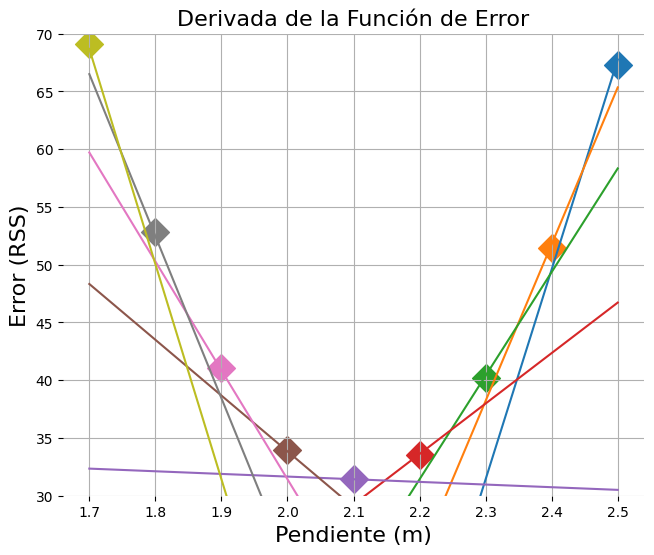

In [24]:
plt.figure(figsize=(7.5, 6))

for i in range(0, len(errores), 1):
    # Error de un modelo dado
    plt.scatter(pendientes[i], errores[i], 
                label="%0.2f" % derivada.evalf(subs={m: pendientes[i]}),
                marker="D", s=200) 
    
    # Evaluación de la derivada para un error dado
    pendiente = derivada.evalf(subs={m: pendientes[i]})
    
    plt.plot(np.array([1.7, 2.5]), 
             np.array([1.7, 2.5])*pendiente + 
             pendiente*(-2.3 + i*0.05) + errores.min())

plt.title("Derivada de la Función de Error", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("Pendiente (m)", size=16)
plt.ylim(30, 70)
plt.grid()
plt.box(False)
plt.show()

## Generalizando para 2 o más parámetros: m y b

<div style="font-size: 1.1rem; text-align: justify;">

Planteamos el mismo ejemplo del principio, pero se cambió un valor de las variables independientes de forma tal de obtener un valor de la constante b (ordenada al origen) distinto de cero. La idea ahora es ver cómo buscar el óptimo a través del gradiente descendiente pero ahora teniendo en cuenta también ese otro parámetro.
</div>

Intersección con eje Y (constante b): -4.38
Pendiente (m): 2.45
Suma de cuadrados de los residuos/errores (RSS): 4.03


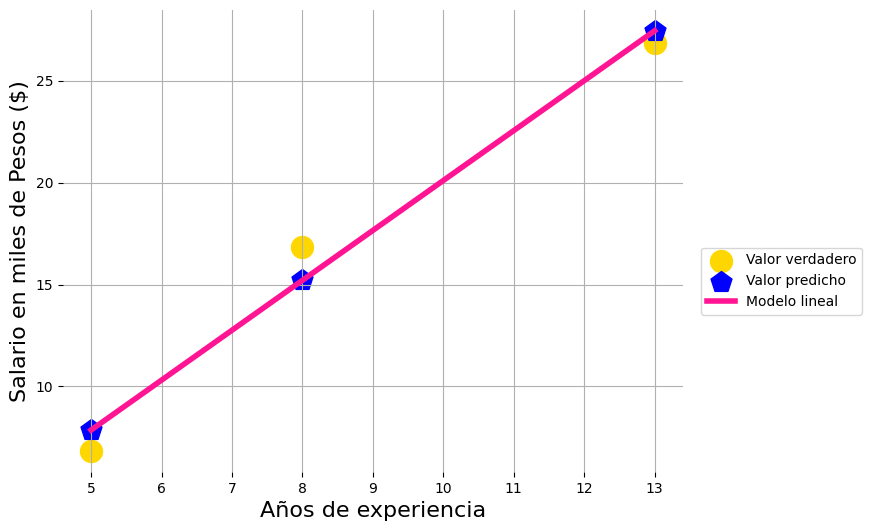

In [25]:
# Variable independiente - años de experiencia en un trabajo
experiencia = np.array([
    [ 5],
    [ 8],
    [13]
])

# Variable dependiente u objetivo - salario en función de los años de experiencia (en miles de pesos mexicanos) - variable que deseamos predecir
salario = np.array([6.85, 16.83, 26.84])

# Modelo lineal creado con el metodo de minimos cuadrados
modelo = LinearRegression().fit(experiencia.reshape(3, -1), salario)

# Visualizacion de datos y modelo
print("Intersección con eje Y (constante b): %0.2f" % modelo.intercept_)
print("Pendiente (m): %0.2f" % modelo.coef_[0])
print("Suma de cuadrados de los residuos/errores (RSS): %0.2f" % ((salario - modelo.predict(experiencia))**2).sum())

plt.figure(figsize=(8, 6))

# Genera puntos de las observaciones reales
plt.scatter(experiencia, salario, 
            color="gold", s=250, marker="o", label="Valor verdadero")

# Genera puntos de mis predicciones
plt.scatter(experiencia, modelo.predict(experiencia),
           color="blue", s=250, marker="p", label="Valor predicho")

# Genera la recta del modelo
plt.plot(experiencia, modelo.predict(experiencia),
        linewidth=4, color="deeppink", label="Modelo lineal")

experiencia = experiencia.reshape(3)

plt.ylabel("Salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de experiencia", size=16)
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()

## Función de Error con m, b

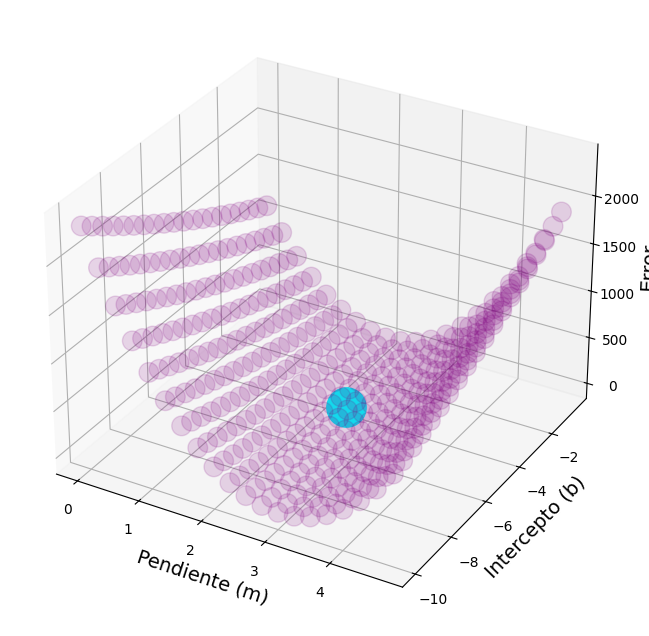

In [26]:
def error_RSS(m, b):
    # cada uno es: (y observado - y predicho)^2
    return (6.85 - (m*5 +b))**2 + (16.83 - (m*8 + b))**2 + (26.84 - (m*13 + b))**2

# Generacion de matriz de 400 filas + 3 columnas: las columnas son la pendiente, interceptor, error
puntos = np.zeros(shape=(400, 3))
i = 0
# vamos probando con pendientes e interceptores aleatorias dentro de un rango para analizar cual combinacion se acerca al error menor o mas optimo
for pendiente in np.arange(0, 5, 0.25):
    for intercepto in np.arange(-10, 0, 0.50):
        puntos[i][0] = pendiente
        puntos[i][1] = intercepto
        puntos[i][2] = error_RSS(pendiente, intercepto)
        i += 1

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

# Mínimo global (donde ya sabemos cual es la pendiente y el interceptor optimos)
ax.scatter(2.45, -4.38, 4.03,
           marker="o", c="cyan", s=800)

# Todos los otros puntos
ax.scatter(puntos.T[0], puntos.T[1], puntos.T[2],
           marker="o", c="purple", s=200, alpha=0.15)

ax.set_xlabel('Pendiente (m)', size=14)
ax.set_ylabel('Intercepto (b)', size=14)
ax.set_zlabel('Error', size=14)
#ax.view_init(0, -30)
plt.show()

## Derivadas parciales de la Funcion de Error

In [28]:
m, b = sym.symbols("m b")

error = (6.85 - (m*5 + b))**2 + (16.83 - (m*8 + b))**2 + (26.84 - (m*13 + b))**2

derivada_error_m = sym.diff(error, m)

derivada_error_b = sym.diff(error, b)

print("Derivada parcial respecto a m:", derivada_error_m)

print("Derivada parcial respecto a b:", derivada_error_b)

Derivada parcial respecto a m: 52.0*b + 516.0*m - 1035.62
Derivada parcial respecto a b: 6.0*b + 52.0*m - 101.04


## Pseudocódigo del Gradiente Descendiente

<div style="font-size: 1.1rem; text-align: justify;">
Vistos ya estos ejemplos que nos permitieron realziar un acercamiento intuitivo y visual de qué se trata el algoritmo del gradiente descendiente, en este caso, para optimziar funciones de Machine Learning con el error mínimo, ahora pasemos a conocer los pasos que habrían de realizarse en el algoritmo de manera iterativa hasta llegar a un punto donde hallemos los valores óptimos esperados para nuestros modelos, ya que hasta ahora solo nos valimos de método azarosos, manuales y gráficos con fines didácticos.
</div>

<div style="font-size: 1.1rem; text-align: justify;">
<span style="color:red">1.</span> iteraciones máximas = 10000 (elegido de manera experimental, para probar) <br>
<span style="color:red">2.</span> iteración = 0 <br>
<span style="color:red">3.</span> tasa de aprendizaje = 0.001 (siempre se ubica entre 0 y 1). Significa de qué tamaño será el paso a dar en cada iteración para ir hallando el óptimo. Lo ideal justamente es ir dando pequeños pasos<br>
<span style="color:red">4.</span> inicialización aleatoria de parámetros <br>
<span style="color:red">5.</span> mientras (iteración < iteraciones máximas) hacer: <br>
<span style="color:red">6.</span> &nbsp;&nbsp;&nbsp;&nbsp; calcular gradientes en la posición actual <br>
<span style="color:red">7.</span> &nbsp;&nbsp;&nbsp;&nbsp; actualizar parámetros en función de los gradientes y la tasa de aprendizaje<br>
<span style="color:red">8.</span> &nbsp;&nbsp;&nbsp;&nbsp; iteración += 1 <br>
</div>


## Implementación del Gradiente Descendiente

In [31]:
iteraciones_max = 10000
tasa_de_aprendizaje = 0.001

# Inicializacion aleatoria de pendiente e intercepto
pendiente = 0
intercepto = -10

# esto nos va a servir para graficar cada paso para tener una idea visual de cual termino siendo el optimo
errores = np.zeros(shape=(iteraciones_max, 3))

for i in range(iteraciones_max):
    # Calculo de los gradientes
    gradientes = [derivada_error_m.evalf(subs={m : pendiente, 
                                               b : intercepto}),
                  derivada_error_b.evalf(subs={m : pendiente, 
                                               b : intercepto})]

    # Actualizacion de parametros (IMPORTANTE, ya que es la formula del gradiente)
    pendiente = pendiente - tasa_de_aprendizaje * gradientes[0] 
    intercepto = intercepto - tasa_de_aprendizaje * gradientes[1]

    # Registro de los errores
    errores[i][0] = pendiente 
    errores[i][1] = intercepto 
    errores[i][2] = error_RSS(pendiente, intercepto) 


    
# Valores calculados vía el Método de Mínimos Cuadrados de sklearn
# Pendiente (m): 2.44898163
# Intercepto (b): -4.382390816326527

# Valores calculados con nuestro algoritmo de Gradiente Descendiente (son los valores obtenidos al final de las iteraciones):
print("Derivada pendiente (m) =", gradientes[0])
print("Derivada intercepto (b) =", gradientes[1])
print("m =", pendiente, "b =", intercepto)

Derivada pendiente (m) = 0.000218445852030267
Derivada intercepto (b) = -0.00216449575579388
m = 2.44835147659091 b = -4.37940660844884


<div style="font-size: 1.1rem; text-align: justify;">
Como vemos, los valores de m y b obtenidos con este algoritmo se acercan bastante a los obtenidos con el algoritmo de regresión lineal con mínimos cuadrados de ScikitLearn. Por otra parte, ambas derivadas parciales evaluadas en esos valores están muy cerca del cero, lo que también nos indica que se aproximan mucho al óptimo en cero.
</div>

## Visualización del Descenso del Error

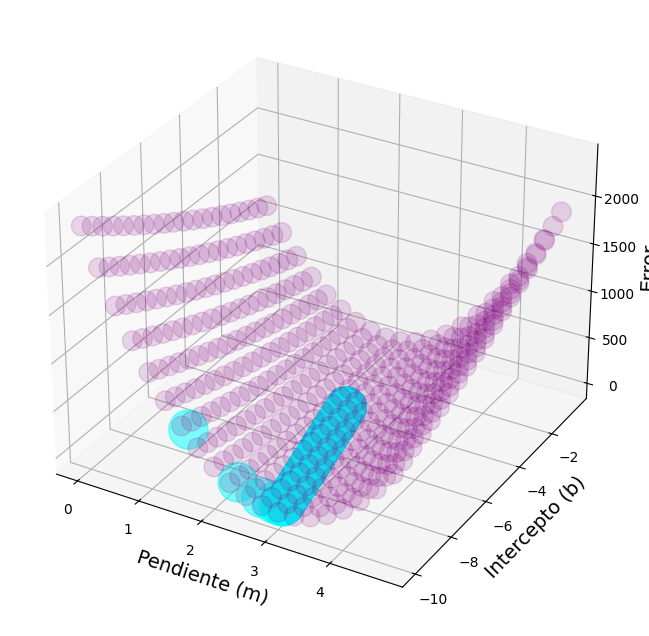

In [30]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

# Camino decreciente de errores
ax.scatter(errores.T[0], errores.T[1], errores.T[2],
           marker="o", c="cyan", s=800, alpha=0.5)

# Todos los otros puntos
ax.scatter(puntos.T[0], puntos.T[1], puntos.T[2],
           marker="o", c="purple", s=200, alpha=0.15)

ax.set_xlabel('Pendiente (m)', size=14)
ax.set_ylabel('Intercepto (b)', size=14)
ax.set_zlabel('Error', size=14)
plt.show()